# Parfit Examples

Note:

1. You can either use **bestFit** to automate the steps of the process, and optionally plot the scores over the parameter grid, OR you can do each step in order: 

> `fitModels` -> `scoreModels` -> `plotScores` -> `getBestModel` -> `getBestScore`

or for cross-valdation

> `crossvalModels` -> `plotScores` -> `getBestModel` -> `getBestScore`

Traditional imports to create our models:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier, LogisticRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, recall_score, mean_squared_error

New imports we need to run our code

In [2]:
from parfit import bestFit
from parfit.fit import *
from parfit.score import *
from parfit.plot import *
from parfit.crossval import *

# Scoring on a defined validation set

## Classification Models

### Generating data

In [3]:
X_train = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_train = np.asarray([1 if xMax > 1 else 0 for xMax in np.max(X_train, axis=1)])
X_val = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_val = np.asarray([1 if xMax > 1 else 0 for xMax in np.max(X_val, axis=1)])

In [4]:
X_train.head()

,x_exp,x_norm,x_unif
0,0.132174,-0.947392,0.053319
1,0.590553,-0.123665,0.258480
2,0.526505,0.390162,-0.978433
3,0.220798,-0.571553,0.577896
4,0.213327,-0.362727,0.339319


In [5]:
y_train[0:5]

array([0, 0, 0, 0, 0])

### Varying one parameter (LogisticRegression)

In [6]:
lr_grid = {
    'C': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
    'penalty': ['l2'],
    'n_jobs': [-1]
}
lr_paramGrid = ParameterGrid(lr_grid)

In [7]:
lr_models = fitModels(LogisticRegression(), lr_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0326s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


In [8]:
lr_scores = scoreModels(lr_models, X_val, y_val, metric=recall_score, predict_proba=False)

[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.2s finished


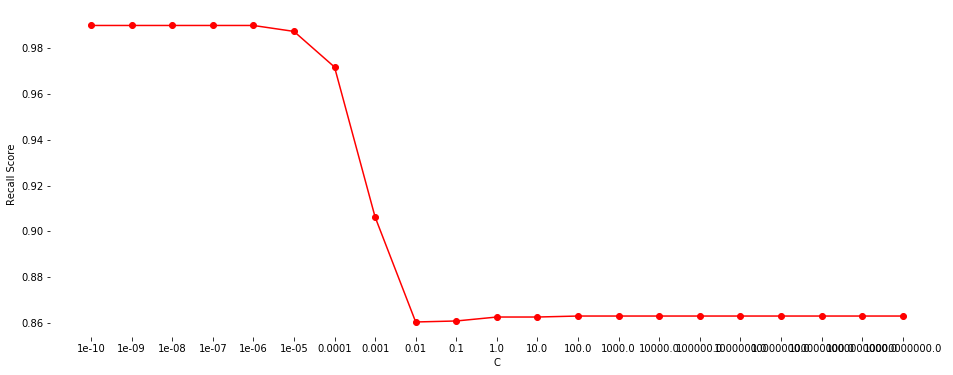

In [9]:
plotScores(lr_scores, lr_paramGrid, 'Recall Score')

In [10]:
getBestModel(lr_models, lr_scores, greater_is_better=True)

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
getBestScore(lr_scores, greater_is_better=True)

0.9898488120950324

Or, in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0165s.) Setting batch_size=24.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.2s finished


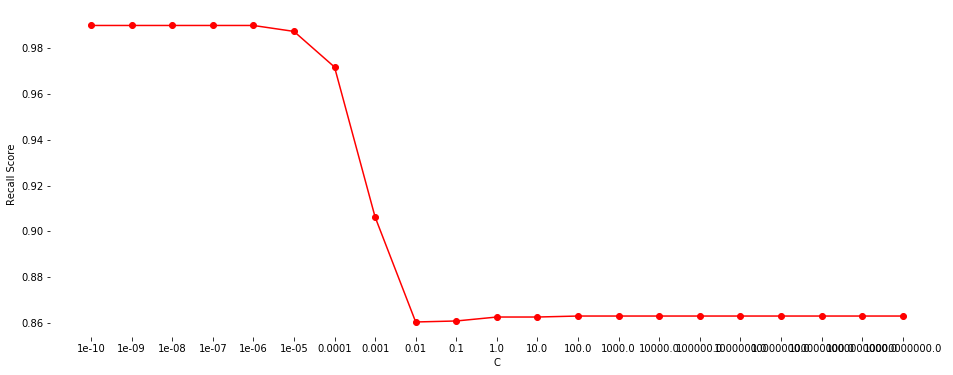

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 0.9898488120950324


In [12]:
lr_bestModel, lr_bestScore, lr_allModels, lr_allScores = bestFit(LogisticRegression(), lr_paramGrid, 
                                                   X_train, y_train, X_val, y_val, 
                                                   metric=recall_score, greater_is_better=True, 
                                                   predict_proba=False, scoreLabel = 'Recall Score')
print(lr_bestModel, lr_bestScore)

### Varying two parameters (Random Forest Classifier)

In [13]:
rf_grid = {
    'n_estimators': [50],
    'min_samples_leaf': [1,3,5,10,15,25,50,75,100],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6],
    'n_jobs': [-1]
}
rf_paramGrid = ParameterGrid(rf_grid)

In [14]:
rf_models = fitModels(RandomForestClassifier(), rf_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:    2.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:    2.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.8s finished


In [15]:
rf_scores = scoreModels(rf_models, X_val, y_val, roc_auc_score, predict_proba=True)

[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.8s finished


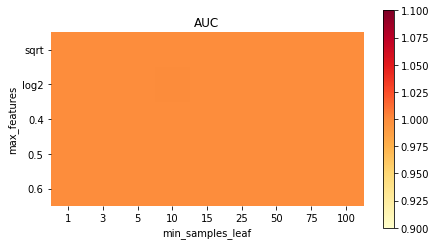

In [16]:
plotScores(rf_scores, rf_paramGrid, 'AUC', greater_is_better=True)

In [17]:
getBestModel(rf_models, rf_scores, greater_is_better=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
getBestScore(rf_scores, greater_is_better=True)

1.0000000000000002

Or in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:    2.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:    2.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.8s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.8s finished


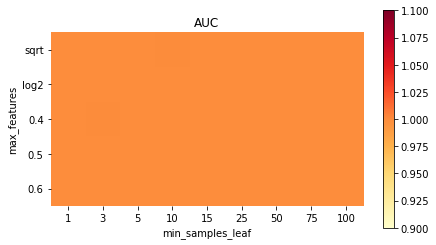

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 1.0000000000000002


In [19]:
rf_bestModel, rf_bestScore, rf_allModels, rf_allScores = bestFit(RandomForestClassifier(), rf_paramGrid, 
                                                   X_train, y_train, X_val, y_val, 
                                                   metric=roc_auc_score,  greater_is_better=True, 
                                                   scoreLabel = 'AUC')
print(rf_bestModel, rf_bestScore)

### Varying three parameters (Gradient Boosting Classifier)

In [20]:
gbm_grid = {
    'learning_rate' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'subsample': np.linspace(0.5,1 ,6),
    'min_samples_leaf': [1,3,5,10,15,25,50]
}
gbm_paramGrid = ParameterGrid(gbm_grid)

In [21]:
gbm_models = fitModels(GradientBoostingClassifier(), gbm_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   16.2s
[Paralle

In [22]:
gbm_scores = scoreModels(gbm_models, X_val, y_val, metric=roc_auc_score)

[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    1.1s finished


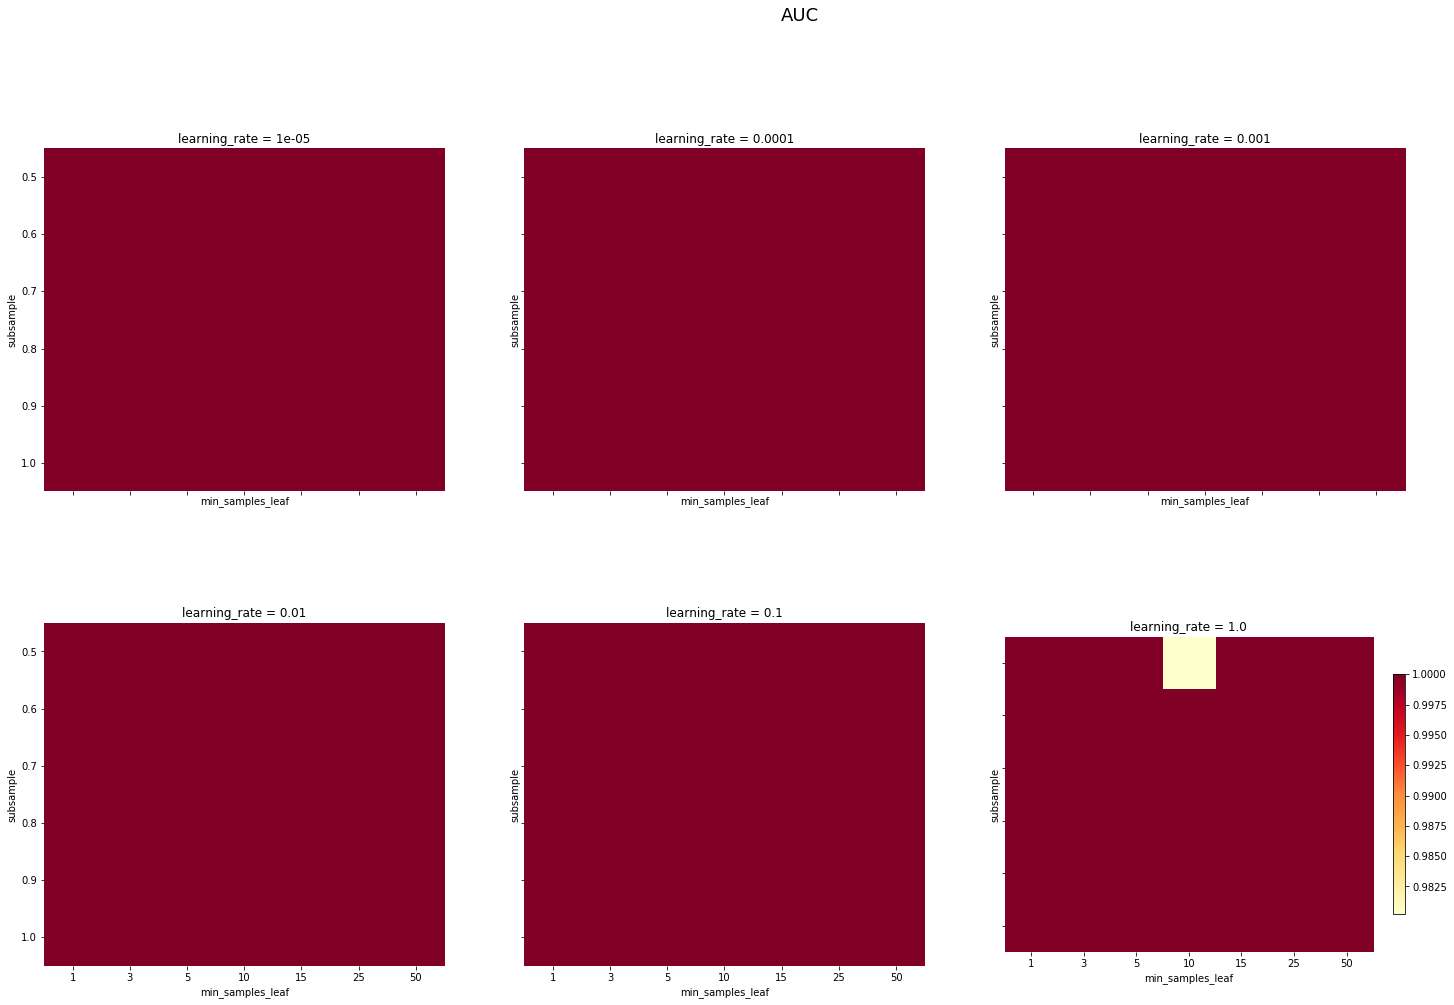

In [23]:
plotScores(gbm_scores, gbm_paramGrid, scoreLabel = 'AUC', greater_is_better=True)

In [24]:
getBestModel(gbm_models, gbm_scores, greater_is_better=True)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1e-05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [25]:
getBestScore(gbm_scores, greater_is_better=True)

1.0

Or, in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   17.5s
[Paralle

-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:   20.5s finished
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    1.7s finished


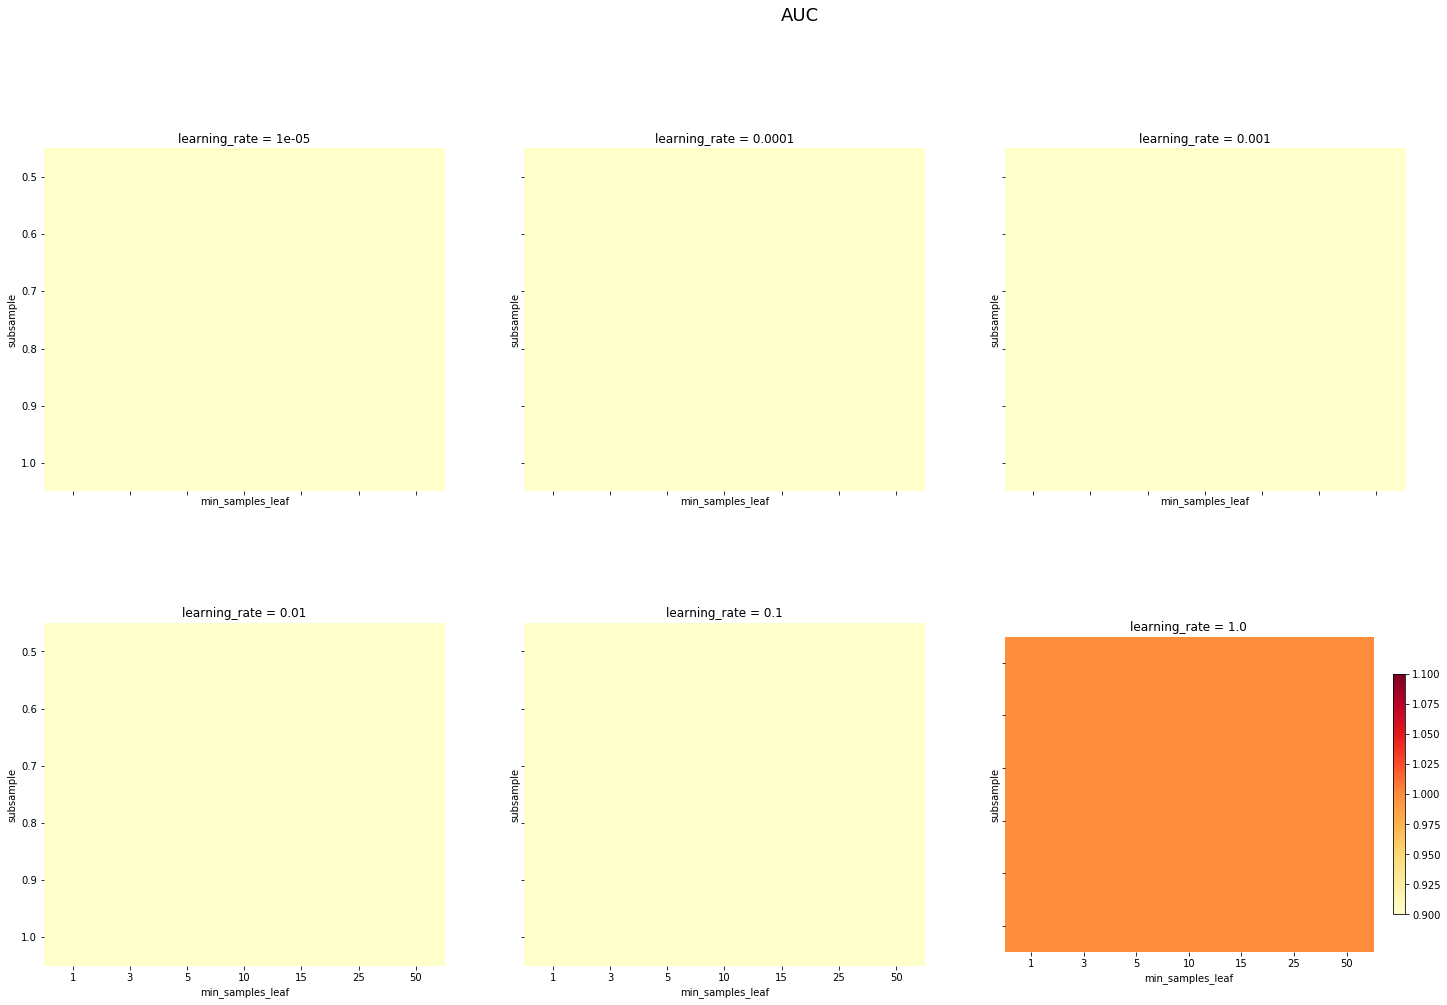

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1e-05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False) 1.0


In [26]:
gbm_bestModel, gbm_bestScore, gbm_allModels, gbm_allScores = bestFit(GradientBoostingClassifier(), gbm_paramGrid,
                                                                    X_train, y_train, X_val, y_val,
                                                                    metric=roc_auc_score, greater_is_better=True,
                                                                    scoreLabel="AUC")
print(gbm_bestModel, gbm_bestScore)

## Regression Models

### Generating data

In [27]:
X_train = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_train = np.random.normal(0,1,10000)
X_val = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_val = np.random.normal(0,1,10000)

In [28]:
X_train.head()

,x_exp,x_norm,x_unif
0,0.258283,1.565817,-0.583274
1,1.270053,0.644139,0.672428
2,0.805222,0.203009,0.167801
3,1.257079,1.474338,-0.715434
4,0.988119,0.890904,0.375182


In [29]:
y_train[0:5]

array([ 0.39776805,  0.05172331,  0.33361497,  0.78001557, -0.01964461])

### Varying one parameter (Ridge Regression)

In [30]:
ridge_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
}
ridge_paramGrid = ParameterGrid(ridge_grid)

In [31]:
ridge_models = fitModels(Ridge(), ridge_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0192s.) Setting batch_size=20.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


In [32]:
ridge_scores = scoreModels(ridge_models, X_val, y_val, mean_squared_error, predict_proba=False)

[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


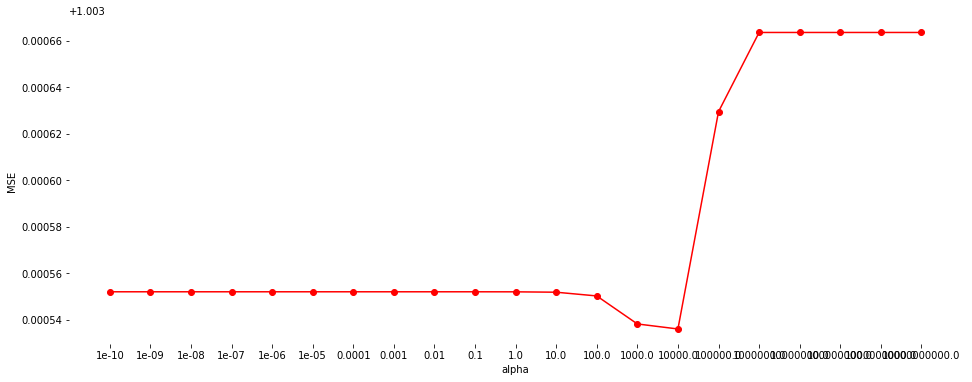

In [33]:
plotScores(ridge_scores, ridge_paramGrid, "MSE")

In [34]:
getBestModel(ridge_models, ridge_scores, greater_is_better=False)

Ridge(alpha=10000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
getBestScore(ridge_scores, greater_is_better=False)

1.0035360520352457

Or in one line of code!

-------------FITTING MODELS-------------
-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0096s.) Setting batch_size=40.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


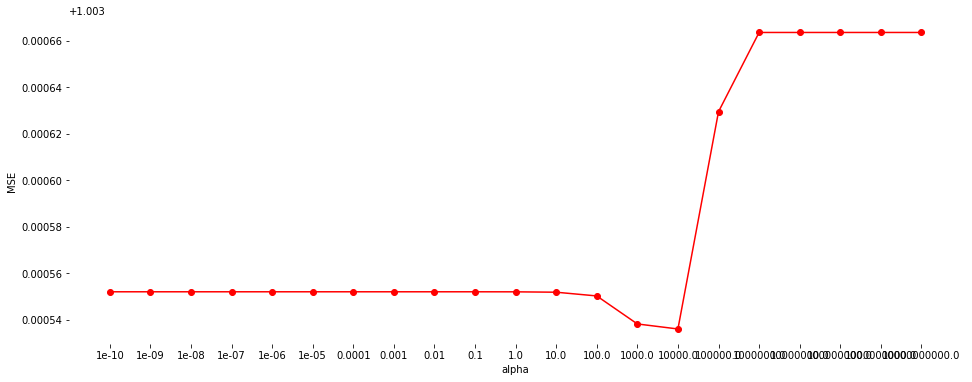

Ridge(alpha=10000000000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 1.0036634833028455


In [36]:
ridge_bestModel, ridge_bestScore, ridge_allModels, ridge_allScores = bestFit(Ridge(), ridge_paramGrid, 
                                                            X_train, y_train, X_val, y_val, 
                                                            metric=mean_squared_error, greater_is_better=True, 
                                                            predict_proba=False, scoreLabel = 'MSE')
print(ridge_bestModel, ridge_bestScore)

### Varying two parameters (Elastic Net + Random Forest Regressor)

#### ElasticNet

In [37]:
en_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
    'l1_ratio': np.linspace(0,1,21)
}
en_paramGrid = ParameterGrid(en_grid)

In [38]:
en_models = fitModels(ElasticNet(), en_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0432s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1648s.) Setting batch_size=18.
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    4.1s finished


In [39]:
en_scores = scoreModels(en_models, X_val, y_val, mean_squared_error, predict_proba=False)

[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    1.6s finished


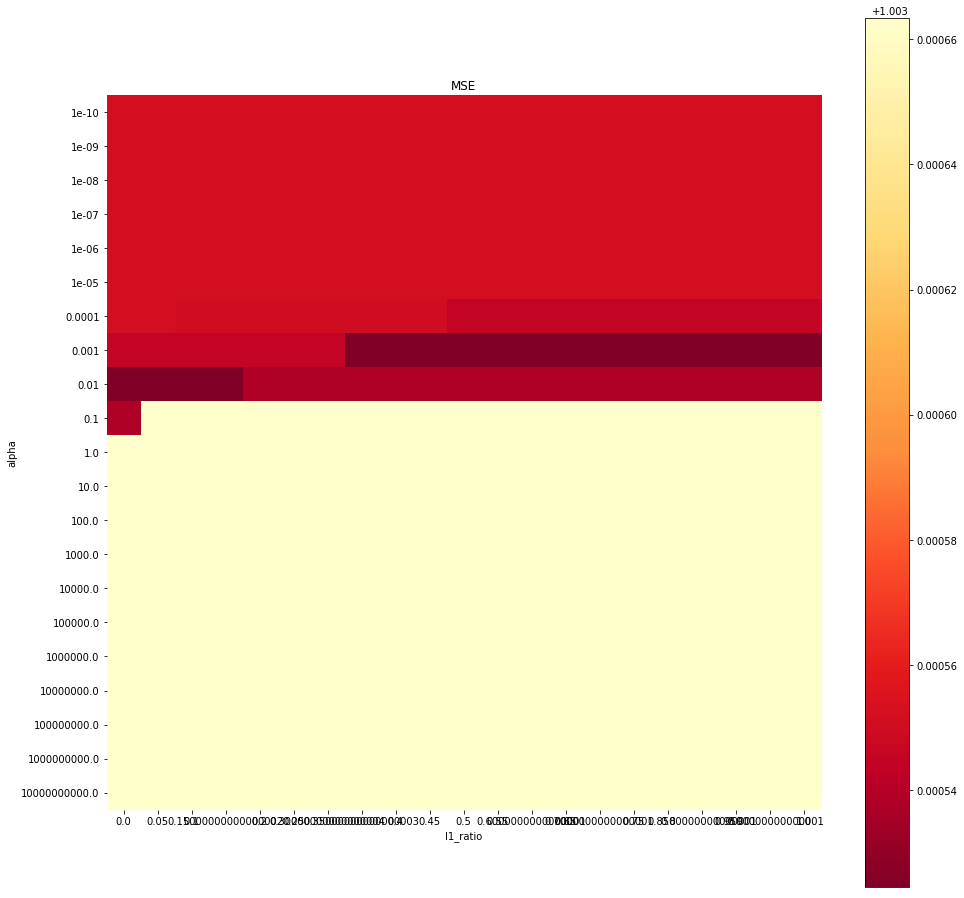

In [40]:
plotScores(en_scores, en_paramGrid, "MSE", greater_is_better=False)

In [41]:
getBestModel(en_models, en_scores, greater_is_better=False)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True,
      l1_ratio=0.15000000000000002, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
getBestScore(en_scores, greater_is_better=False)

1.003524469561085

Or in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0365s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 336 out of 441 | elapsed:    2.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 381 out of 441 | elapsed:    3.3s remaining:    0.5s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    0.7s finished


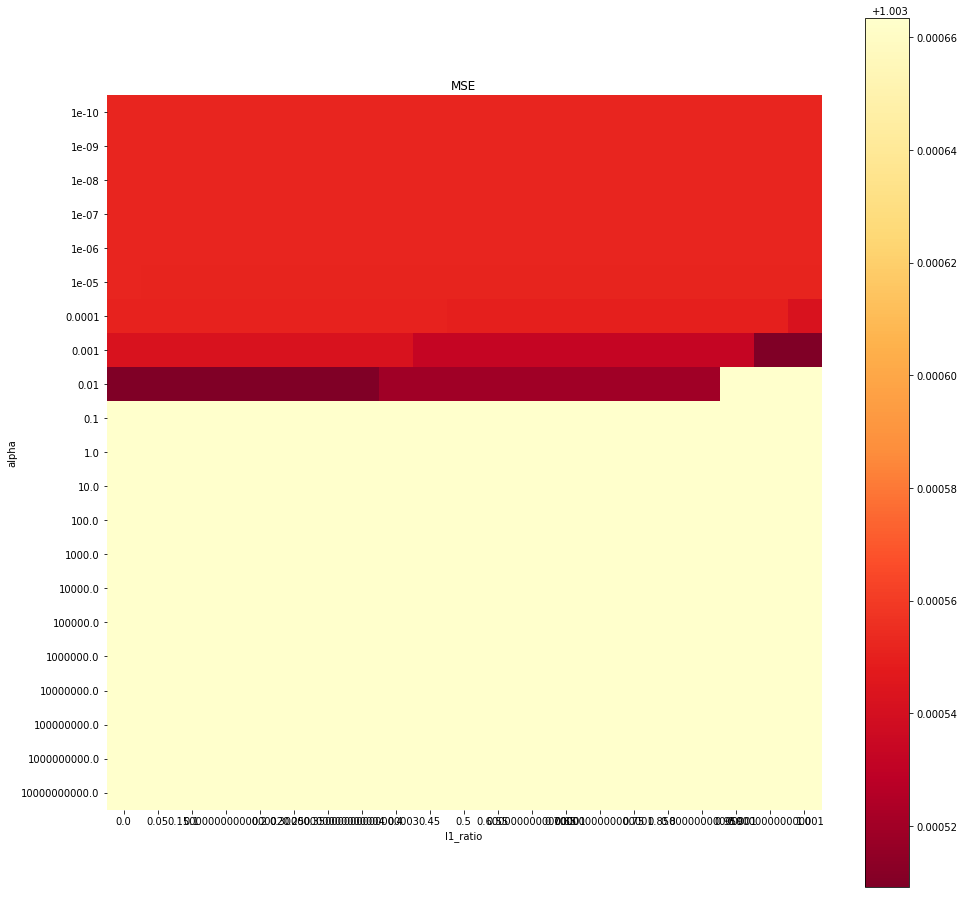

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True,
      l1_ratio=0.35000000000000003, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 1.0035091286347468


In [43]:
en_bestModel, en_bestScore, en_allModels, en_allScores = bestFit(ElasticNet(), en_paramGrid, 
                                                   X_train, y_train, X_val, y_val, 
                                                   metric=mean_squared_error,  greater_is_better=False,
                                                   predict_proba=False, scoreLabel = 'MSE')
print(en_bestModel, en_bestScore)

#### RandomForestRegressor

In [44]:
rf_grid = {
    'n_estimators': [50],
    'min_samples_leaf': [1,3,5,10,15,25,50,75,100,125,150,175,200,250,300,400,500],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6],
    'n_jobs': [-1]
}
rf_paramGrid = ParameterGrid(rf_grid)

In [45]:
rfreg_models = fitModels(RandomForestRegressor(), rf_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  79 out of  85 | elapsed:    9.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:   10.2s finished


In [46]:
rfreg_scores = scoreModels(rfreg_models, X_val, y_val, mean_squared_error, predict_proba=False)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    2.5s finished


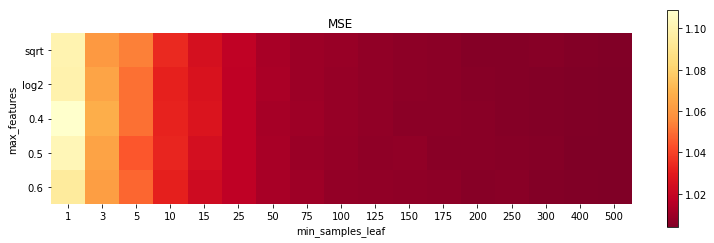

In [47]:
plotScores(rfreg_scores, rf_paramGrid, "MSE", greater_is_better=False)

In [48]:
getBestModel(rfreg_models, rfreg_scores, greater_is_better=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=500, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
getBestScore(rfreg_scores, greater_is_better=False)

1.003814144701339

Or in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  79 out of  85 | elapsed:    9.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    9.4s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    2.1s finished


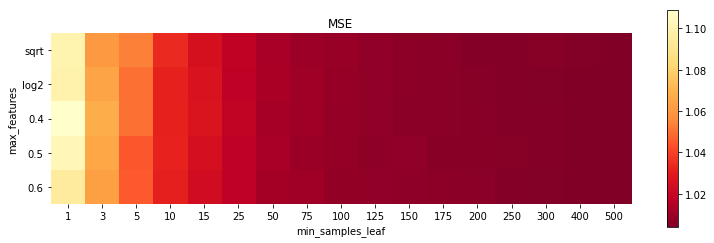

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=500, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 1.003814144701339


In [50]:
rfreg_bestModel, rfreg_bestScore, rfreg_allModels, rfreg_allScores = bestFit(RandomForestRegressor(), rf_paramGrid, 
                                                            X_train, y_train, X_val, y_val, 
                                                            metric=mean_squared_error, greater_is_better=False,
                                                            predict_proba=False, scoreLabel = 'MSE')
print(rfreg_bestModel, rfreg_bestScore)

### Varying three parameters (Gradient Boosting Regressor)

In [51]:
gbm_grid = {
    'learning_rate' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'subsample': np.linspace(0.5,1 ,6),
    'min_samples_leaf': [1,3,5,10,15,25,50]
}
gbm_paramGrid = ParameterGrid(gbm_grid)

In [52]:
gbmreg_models = fitModels(GradientBoostingRegressor(), gbm_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   16.3s
[Paralle

In [53]:
gbmreg_scores = scoreModels(gbmreg_models, X_val, y_val, metric=mean_squared_error,predict_proba=False)

[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    1.3s finished


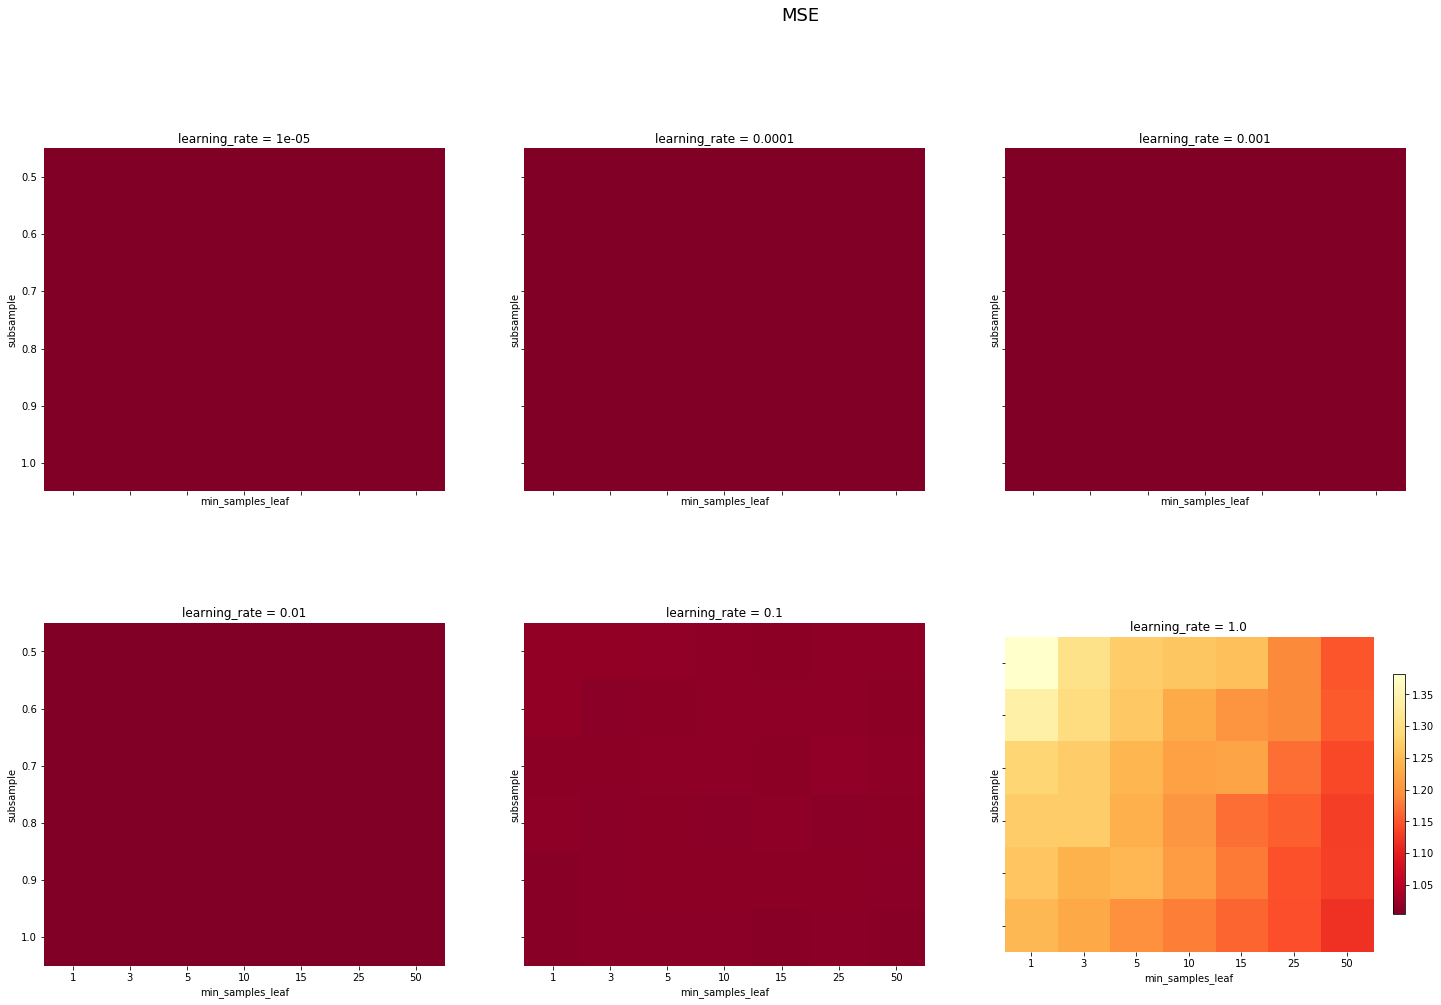

In [54]:
plotScores(gbmreg_scores, gbm_paramGrid, scoreLabel = 'MSE', greater_is_better=False)

In [55]:
getBestModel(gbmreg_models, gbmreg_scores, greater_is_better=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.001, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [56]:
getBestScore(gbmreg_scores, greater_is_better=False)

1.0036163243078495

Or, in one line code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   16.1s
[Paralle

-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:   19.9s finished
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    1.5s finished


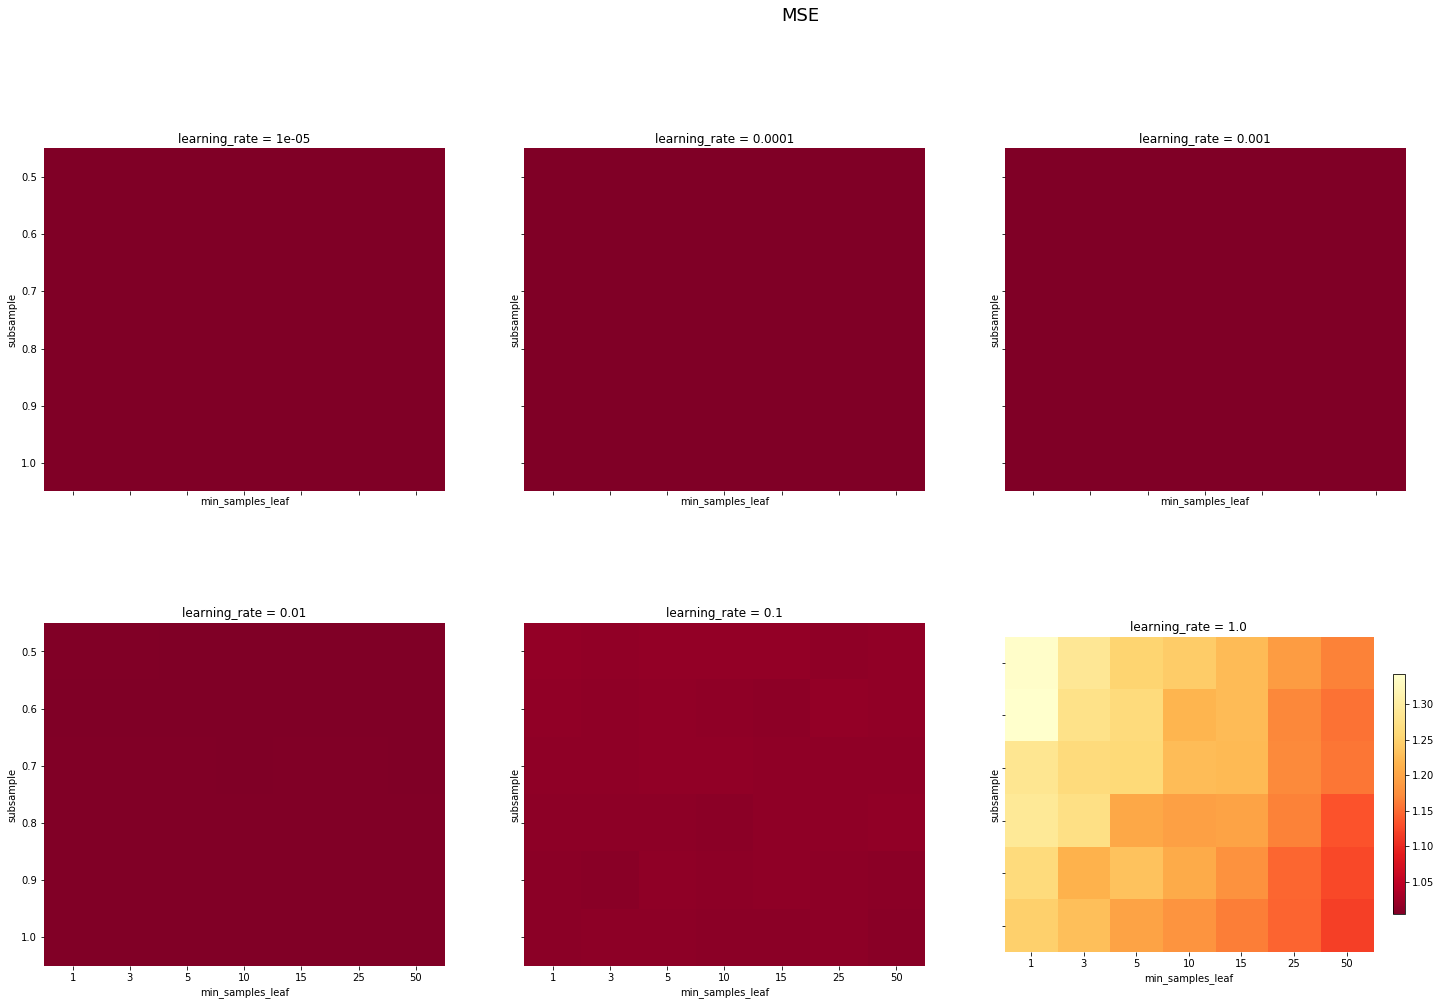

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.001, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False) 1.0036163243078495


In [57]:
gbmreg_bestModel, gbmreg_bestScore, gbmreg_allModels, gbmreg_allScores = bestFit(GradientBoostingRegressor(), gbm_paramGrid,
                                                                    X_train, y_train, X_val, y_val,
                                                                    metric=mean_squared_error, greater_is_better=False,
                                                                    predict_proba=False, scoreLabel="MSE")
print(gbmreg_bestModel, gbmreg_bestScore)

# Cross-validation

## Classification Models

### Generating data

In [58]:
X_train = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_train = np.asarray([1 if xMax > 1 else 0 for xMax in np.max(X_train, axis=1)])

In [59]:
X_train.head()

,x_exp,x_norm,x_unif
0,0.430141,1.324331,-0.745347
1,1.347553,0.556860,0.633490
2,1.808556,0.930080,0.621711
3,0.557889,-0.282652,0.067665
4,2.313572,1.659376,0.839331


In [60]:
y_train[0:5]

array([1, 1, 1, 0, 1])

### Varying one parameter (LogisticRegression)

In [61]:
lr_grid = {
    'C': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
    'penalty': ['l2'],
    'n_jobs': [-1]
}
lr_paramGrid = ParameterGrid(lr_grid)

In [62]:
lr_scores, lr_models = crossvalModels(LogisticRegression(), lr_paramGrid, X_train, y_train, 
                           nfolds=5, metric=recall_score, predict_proba=False)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Paral

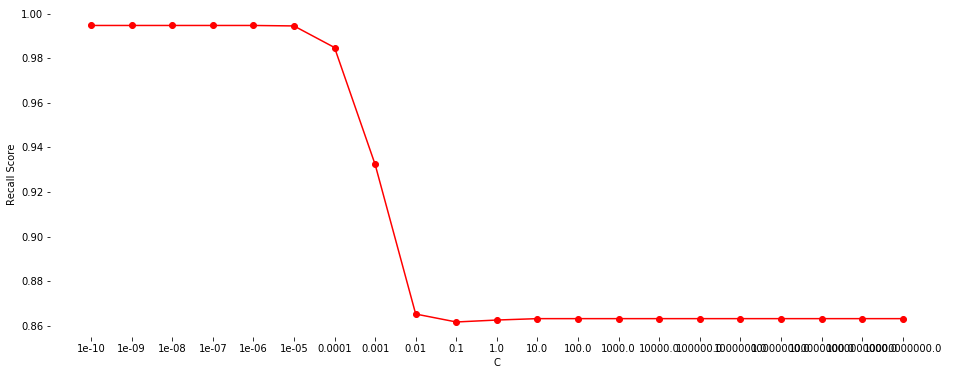

In [63]:
plotScores(lr_scores, lr_paramGrid, 'Recall Score')

In [64]:
getBestModel(lr_models, lr_scores, greater_is_better=True)

{'C': 1e-10, 'n_jobs': -1, 'penalty': 'l2'}

In [65]:
getBestScore(lr_scores, greater_is_better=True)

0.9947229246859994

Or, in one line of code!

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Paral

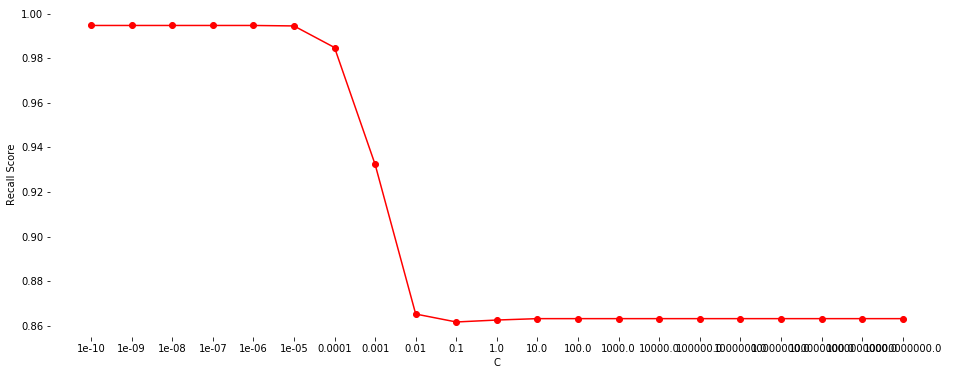

{'C': 1e-10, 'n_jobs': -1, 'penalty': 'l2'} 0.9947229246859994


In [66]:
lr_bestModel, lr_bestScore, lr_allModels, lr_allScores = bestFit(LogisticRegression(), lr_paramGrid, 
                                                   X_train, y_train, nfolds=5,
                                                   metric=recall_score, greater_is_better=True, 
                                                   predict_proba=False, scoreLabel = 'Recall Score')
print(lr_bestModel, lr_bestScore)

### Varying two parameters (Random Forest Classifier)

In [67]:
rf_grid = {
    'n_estimators': [50],
    'min_samples_leaf': [1,3,5,10,15,25,50,75,100],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6],
    'n_jobs': [-1]
}
rf_paramGrid = ParameterGrid(rf_grid)

In [68]:
rf_scores, rf_models = crossvalModels(RandomForestClassifier(), rf_paramGrid, X_train, y_train,
                          nfolds=5, metric=roc_auc_score, predict_proba=True)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_job

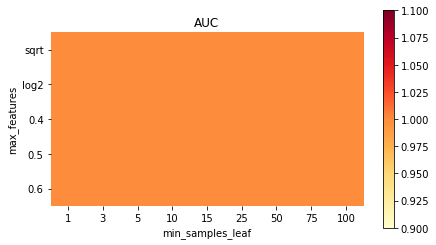

In [69]:
plotScores(rf_scores, rf_paramGrid, 'AUC', greater_is_better=True)

In [70]:
getBestModel(rf_models, rf_scores, greater_is_better=True)

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 50,
 'n_jobs': -1}

In [71]:
getBestScore(rf_scores, greater_is_better=True)

1.0

Or in one line of code!

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_job

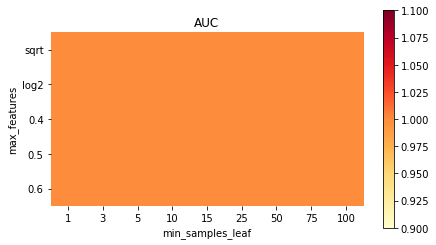

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 50, 'n_jobs': -1} 1.0


In [72]:
rf_bestModel, rf_bestScore, rf_allModels, rf_allScores = bestFit(RandomForestClassifier(), rf_paramGrid, 
                                                   X_train, y_train, nfolds=5,
                                                   metric=roc_auc_score, greater_is_better=True, 
                                                   scoreLabel = 'AUC')
print(rf_bestModel, rf_bestScore)

### Varying three parameters (Gradient Boosting Classifier)

In [73]:
gbm_grid = {
    'learning_rate' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'subsample': np.linspace(0.5,1 ,6),
    'min_samples_leaf': [1,3,5,10,15,25,50]
}
gbm_paramGrid = ParameterGrid(gbm_grid)

In [74]:
gbm_scores, gbm_models = crossvalModels(GradientBoostingClassifier(), gbm_paramGrid, X_train, y_train,
                           nfolds=5, metric=roc_auc_score, predict_proba=True)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: D

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_job

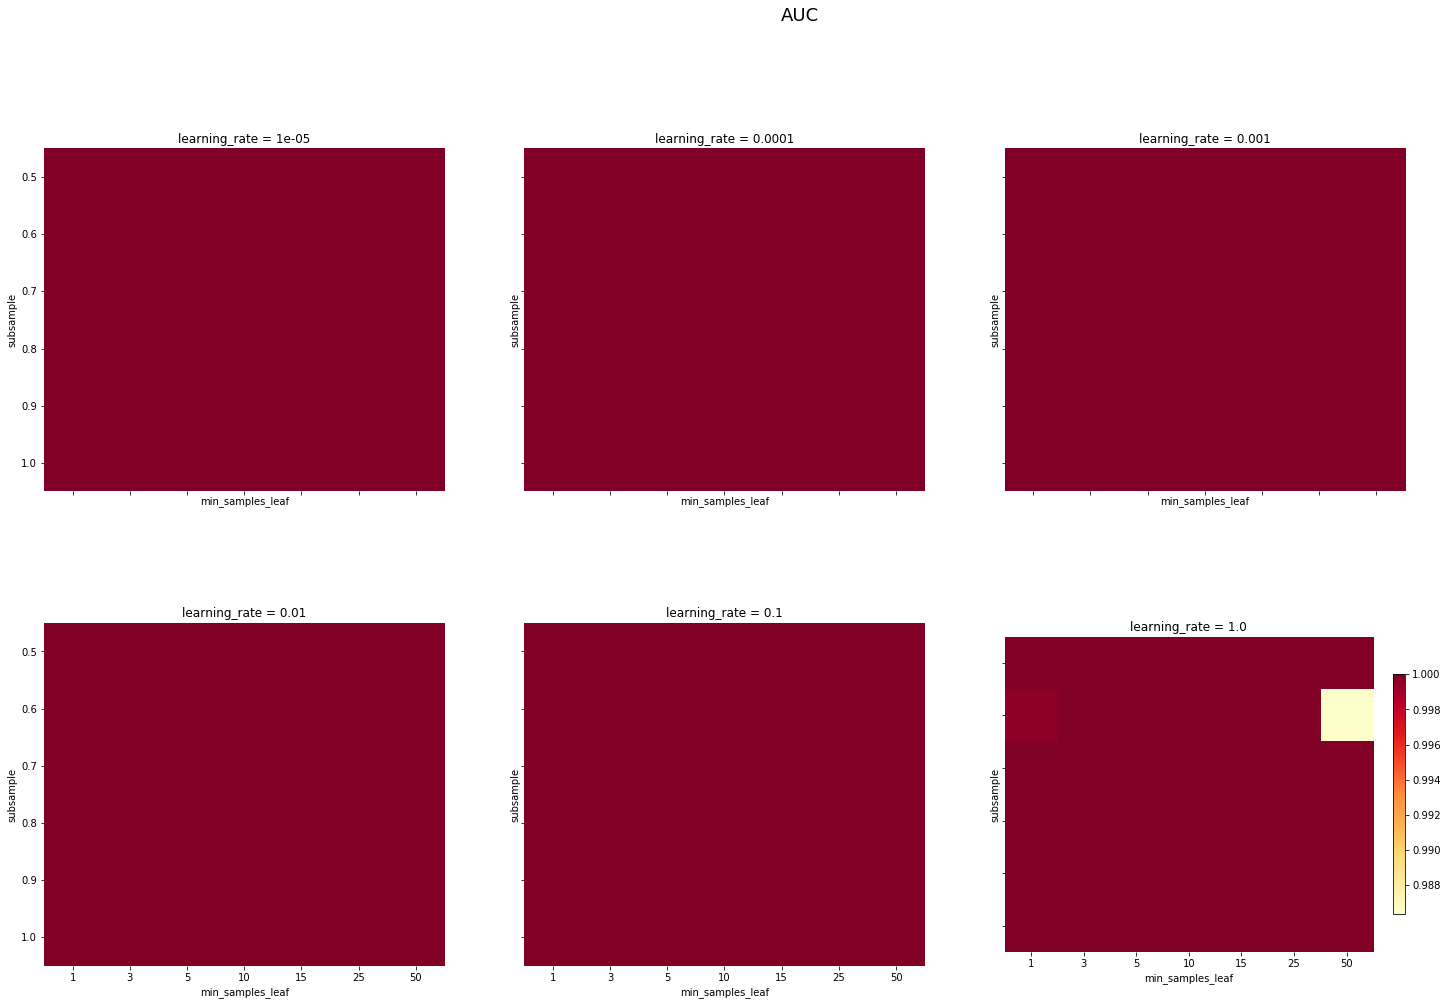

In [75]:
plotScores(gbm_scores, gbm_paramGrid, scoreLabel = 'AUC', greater_is_better=True)

In [76]:
getBestModel(gbm_models, gbm_scores, greater_is_better=True)

{'learning_rate': 1e-05, 'min_samples_leaf': 1, 'subsample': 0.5}

In [77]:
getBestScore(gbm_scores, greater_is_better=True)

1.0

Or, in one line of code!

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: D

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_job

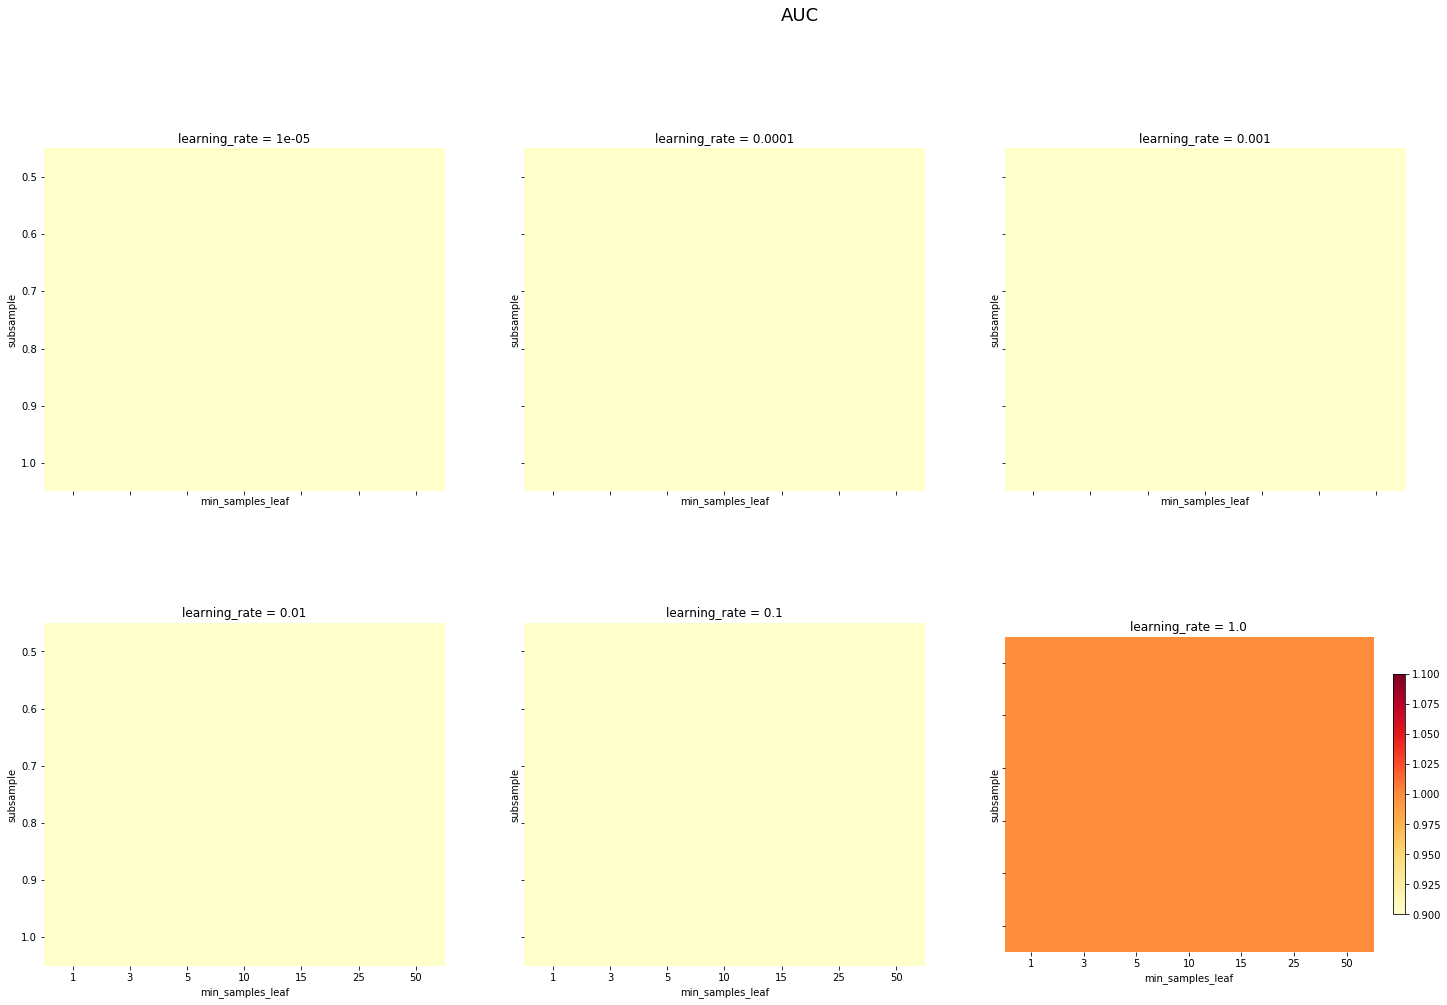

{'learning_rate': 1e-05, 'min_samples_leaf': 1, 'subsample': 0.5} 1.0


In [78]:
gbm_bestModel, gbm_bestScore, gbm_allModels, gbm_allScores = bestFit(GradientBoostingClassifier(), gbm_paramGrid,
                                                                    X_train, y_train, nfolds=5,
                                                                    metric=roc_auc_score, greater_is_better=True,
                                                                    scoreLabel="AUC")
print(gbm_bestModel, gbm_bestScore)

## Regression Models

### Generating data

In [79]:
X_train = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_train = np.random.normal(0,1,10000)

In [80]:
X_train.head()

,x_exp,x_norm,x_unif
0,2.402771,1.534290,0.874431
1,0.146700,0.449042,-0.748675
2,1.231003,0.160109,-0.338043
3,1.927450,-1.118475,-0.098831
4,0.926639,-0.089026,0.219696


In [81]:
y_train[0:5]

array([ 0.95790294, -0.97267271,  1.40680133,  0.50406207, -0.4255623 ])

### Varying one parameter (Ridge Regression)

In [82]:
ridge_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
}
ridge_paramGrid = ParameterGrid(ridge_grid)

In [83]:
ridge_scores, ridge_models = crossvalModels(Ridge(), ridge_paramGrid, X_train, y_train,
                             nfolds=5, metric=mean_squared_error, predict_proba=False)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0567s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.2s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 

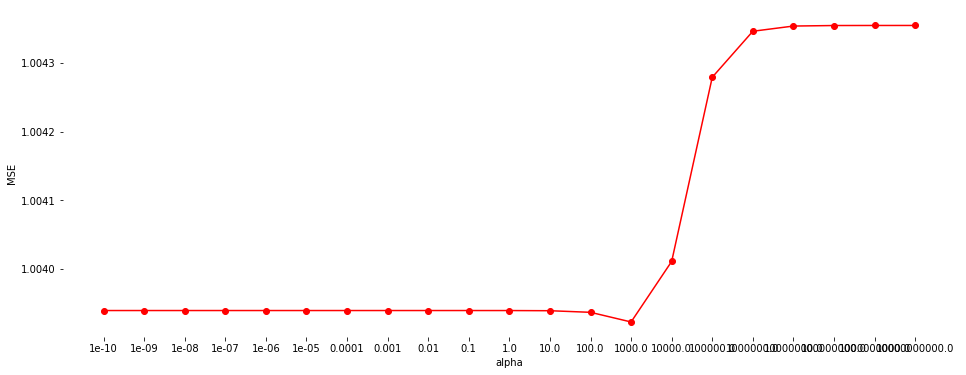

In [84]:
plotScores(ridge_scores, ridge_paramGrid, "MSE")

In [85]:
getBestModel(ridge_models, ridge_scores, greater_is_better=False)

{'alpha': 1000.0}

In [86]:
getBestScore(ridge_scores, greater_is_better=False)

1.0039236287090894

Or in one line of code!

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Paral

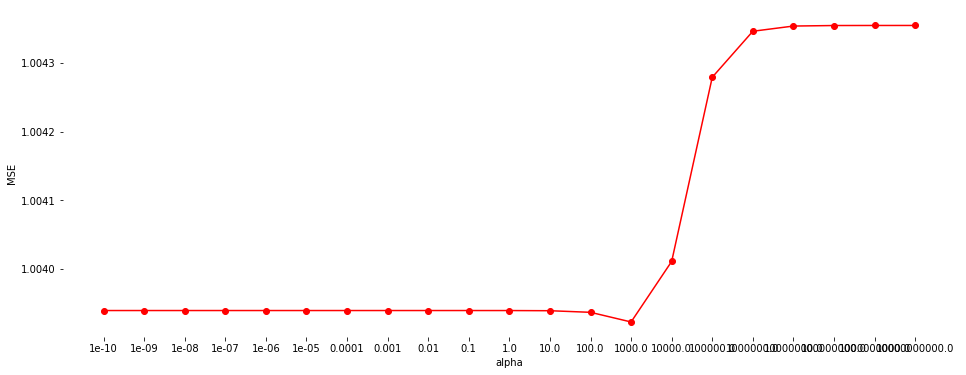

{'alpha': 1000.0} 1.0039236287090894


In [87]:
ridge_bestModel, ridge_bestScore, ridge_allModels, ridge_allScores = bestFit(Ridge(), ridge_paramGrid, 
                                                            X_train, y_train, nfolds=5,
                                                            metric=mean_squared_error, greater_is_better=False, 
                                                            predict_proba=False, scoreLabel = 'MSE')
print(ridge_bestModel, ridge_bestScore)

### Varying two parameters (Elastic Net + Random Forest Regressor)

#### ElasticNet

In [88]:
en_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
    'l1_ratio': np.linspace(0,1,21)
}
en_paramGrid = ParameterGrid(en_grid)

In [89]:
en_scores, en_models = crossvalModels(ElasticNet(), en_paramGrid, X_train, y_train,
                                     nfolds=5, metric=mean_squared_error, predict_proba=False)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0882s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Pa

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Paral

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Paral

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Paral

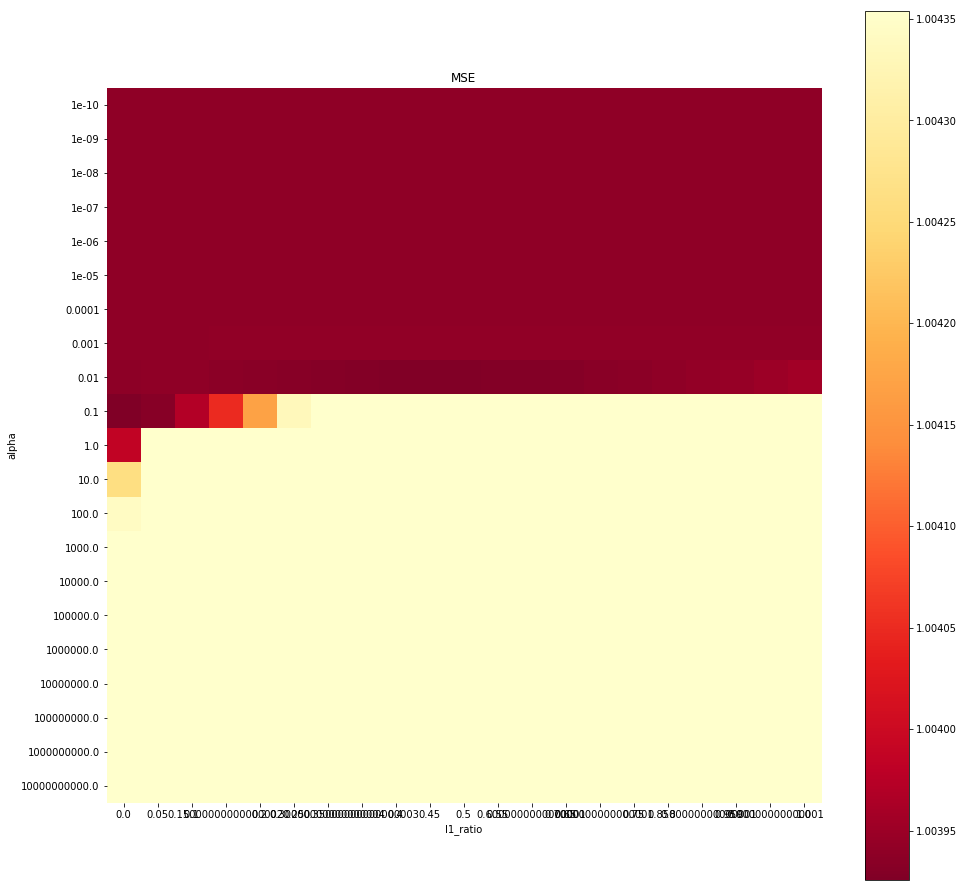

In [90]:
plotScores(en_scores, en_paramGrid, "MSE", greater_is_better=False)

In [91]:
getBestModel(en_models, en_scores, greater_is_better=False)

{'alpha': 0.1, 'l1_ratio': 0.0}

In [92]:
getBestScore(en_scores, greater_is_better=False)

1.0039255191105005

Or in one line of code!

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0546s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Pa

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1122s.) Setting batch_size=3.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s fin

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Paral

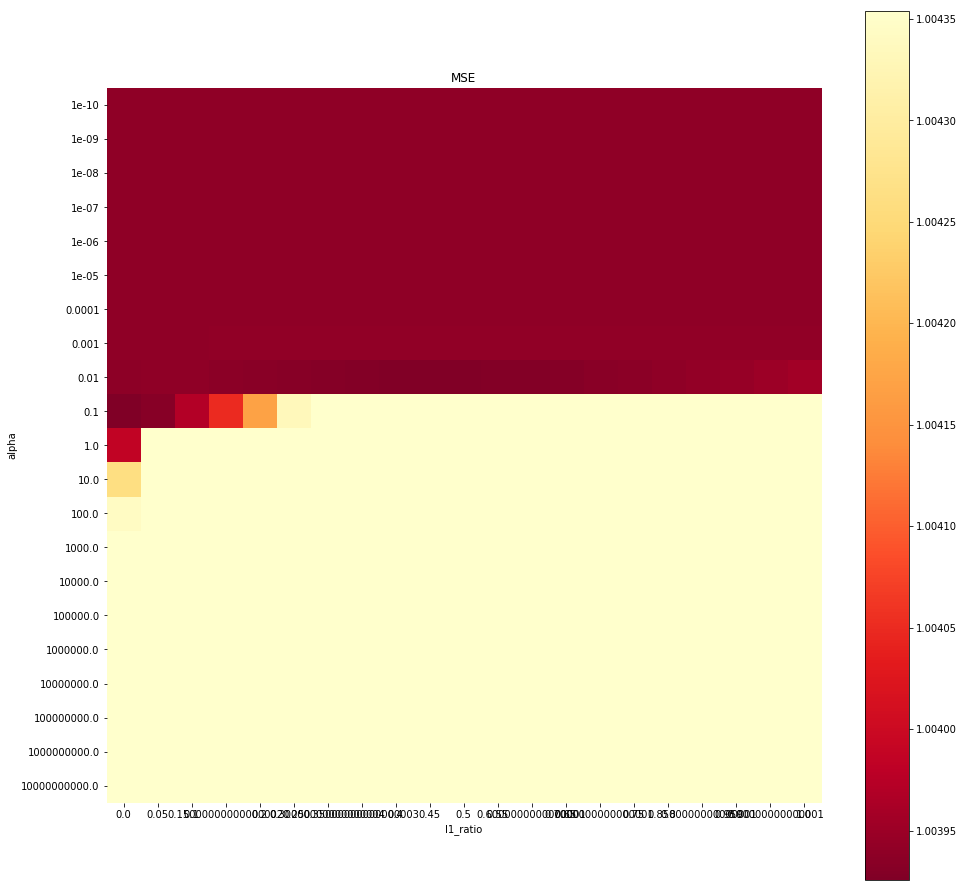

{'alpha': 0.1, 'l1_ratio': 0.0} 1.0039255191105005


In [93]:
en_bestModel, en_bestScore, en_allModels, en_allScores = bestFit(ElasticNet(), en_paramGrid, 
                                                   X_train, y_train, nfolds=5, 
                                                   metric=mean_squared_error, greater_is_better=False,
                                                   predict_proba=False, scoreLabel = 'MSE')
print(en_bestModel, en_bestScore)

#### RandomForestRegressor

In [94]:
rf_grid = {
    'n_estimators': [50],
    'min_samples_leaf': [1,3,5,10,15,25,50,75,100,125,150,175,200,250,300,400,500],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6],
    'n_jobs': [-1]
}
rf_paramGrid = ParameterGrid(rf_grid)

In [95]:
rfreg_scores, rfreg_models = crossvalModels(RandomForestRegressor(), rf_paramGrid, X_train, y_train,
                             nfolds=5, metric=mean_squared_error, predict_proba=False)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_job

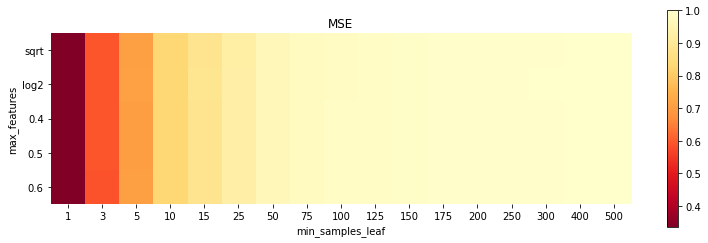

In [96]:
plotScores(rfreg_scores, rf_paramGrid, "MSE", greater_is_better=False)

In [97]:
getBestModel(rfreg_models, rfreg_scores, greater_is_better=False)

{'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 50, 'n_jobs': -1}

In [98]:
getBestScore(rfreg_scores, greater_is_better=False)

0.33448724214564535

Or in one line of code!

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_job

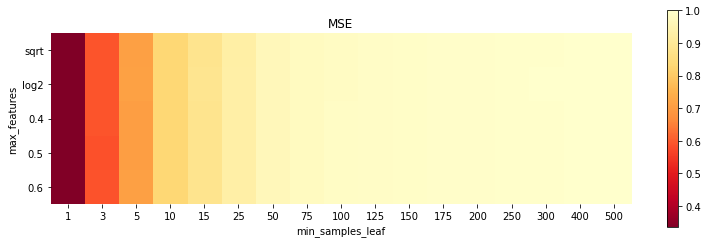

{'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 50, 'n_jobs': -1} 0.33448724214564535


In [99]:
rfreg_bestModel, rfreg_bestScore, rfreg_allModels, rfreg_allScores = bestFit(RandomForestRegressor(), rf_paramGrid, 
                                                            X_train, y_train, nfolds=5,
                                                            metric=mean_squared_error, greater_is_better=False,
                                                            predict_proba=False, scoreLabel = 'MSE')
print(rfreg_bestModel, rfreg_bestScore)

### Varying three parameters (Gradient Boosting Regressor)

In [100]:
gbm_grid = {
    'learning_rate' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'subsample': np.linspace(0.5,1 ,6),
    'min_samples_leaf': [1,3,5,10,15,25,50]
}
gbm_paramGrid = ParameterGrid(gbm_grid)

In [101]:
gbmreg_scores, gbmreg_models = crossvalModels(GradientBoostingRegressor(), gbm_paramGrid, X_train, y_train,
                              nfolds=5, metric=mean_squared_error, predict_proba=False)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_job

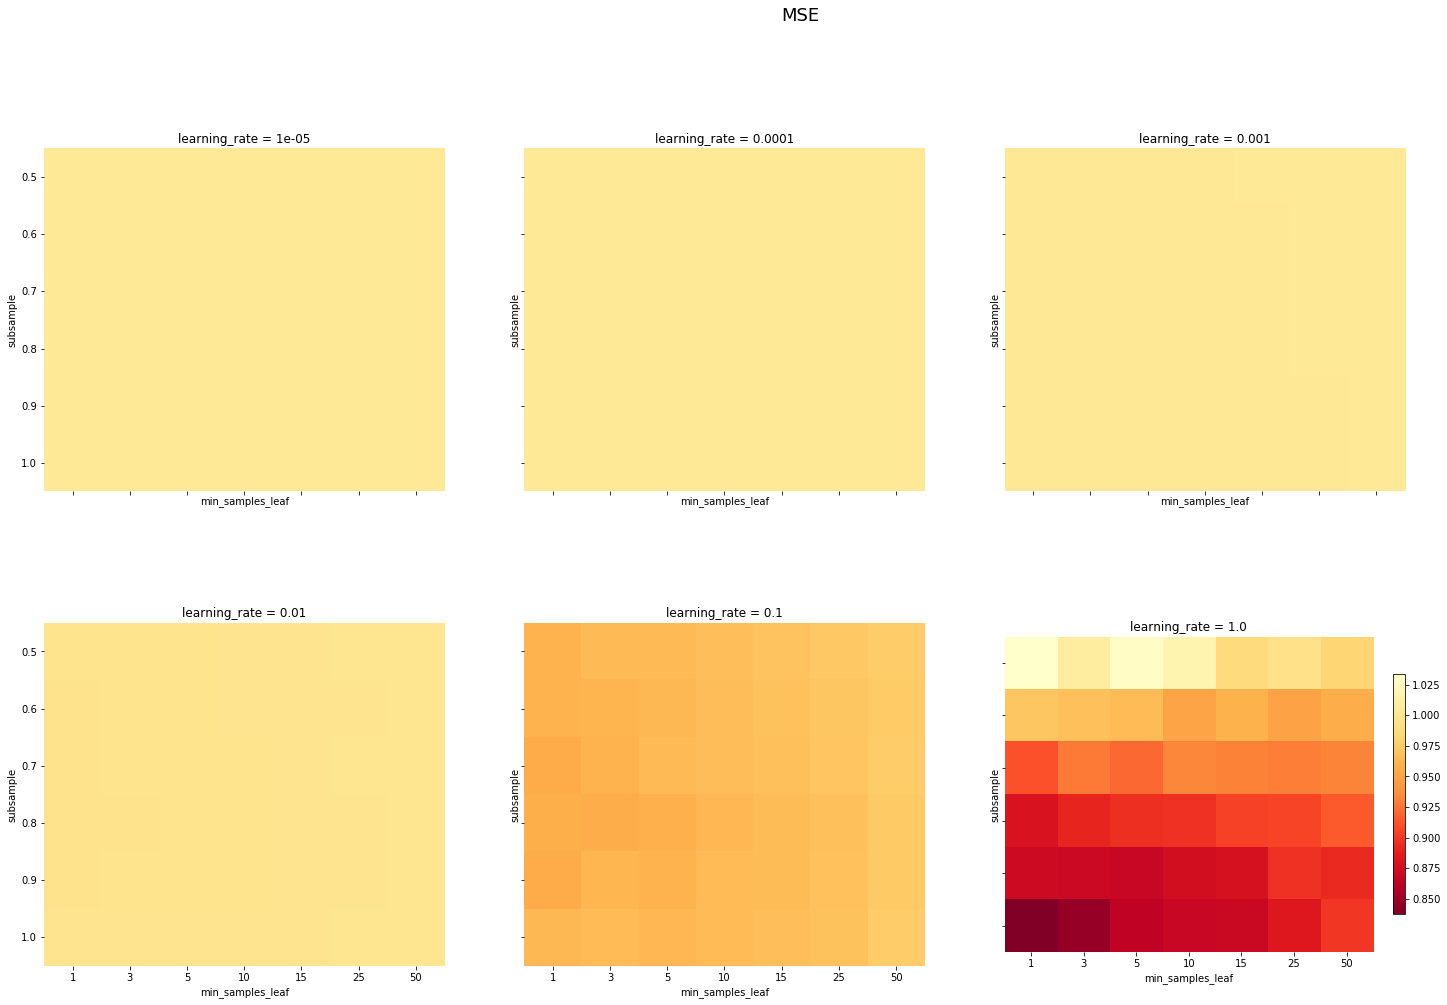

In [102]:
plotScores(gbmreg_scores, gbm_paramGrid, scoreLabel = 'MSE', greater_is_better=False)

In [103]:
getBestModel(gbmreg_models, gbmreg_scores, greater_is_better=False)

{'learning_rate': 1.0, 'min_samples_leaf': 1, 'subsample': 1.0}

In [104]:
getBestScore(gbmreg_scores, greater_is_better=False)

0.8370935343133696

Or, in one line code!

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: D

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_job

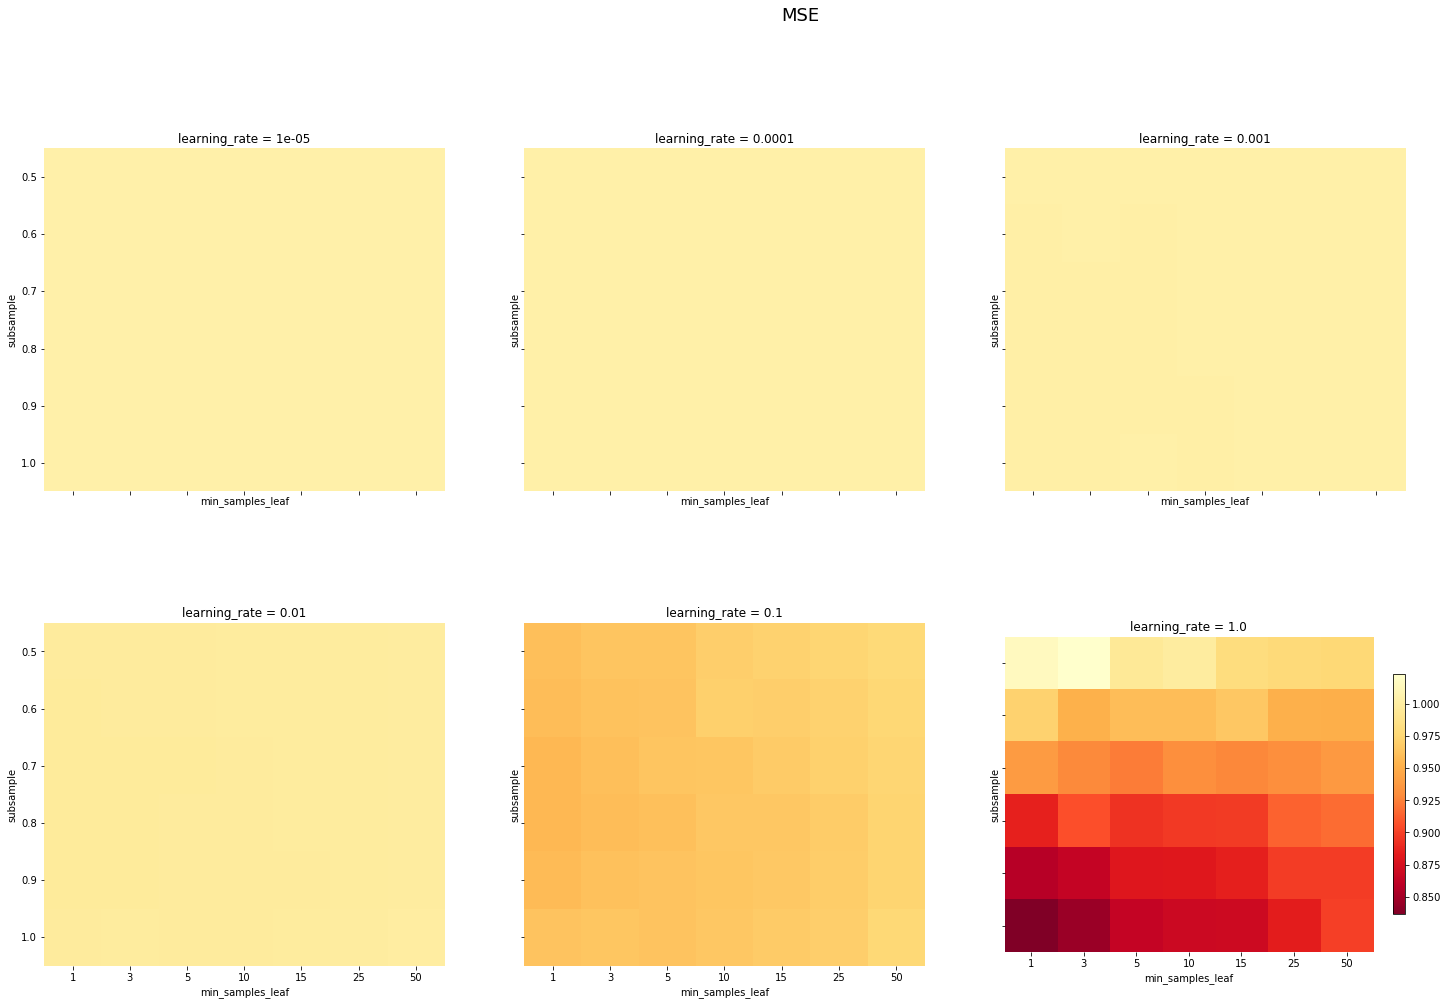

{'learning_rate': 1.0, 'min_samples_leaf': 1, 'subsample': 1.0} 0.8360970292083756


In [105]:
gbmreg_bestModel, gbmreg_bestScore, gbmreg_allModels, gbmreg_allScores = bestFit(GradientBoostingRegressor(), gbm_paramGrid,
                                                                    X_train, y_train, nfolds=5,
                                                                    metric=mean_squared_error, greater_is_better=False,
                                                                    predict_proba=False, scoreLabel="MSE")
print(gbmreg_bestModel, gbmreg_bestScore)